In [1]:
!git clone https://github.com/UCSD-AI4H/COVID-CT.git

Cloning into 'COVID-CT'...
remote: Enumerating objects: 5463, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5463 (delta 0), reused 1 (delta 0), pack-reused 5459
Receiving objects: 100% (5463/5463), 1.09 GiB | 17.57 MiB/s, done.
Resolving deltas: 100% (360/360), done.
Checking out files: 100% (1048/1048), done.


In [2]:
## unzip archives  q - quite, n - don't overwrite
!unzip -q -n '/content/COVID-CT/Images-processed/CT_COVID.zip'
!unzip -q -n '/content/COVID-CT/Images-processed/CT_NonCOVID.zip'

In [3]:
import os
path='/content/CT_COVID/'
for count, filename in enumerate(os.listdir(path)): 
    dst ="covid-" + str(count) + ".png"
    src =path+ filename 
    dst =path+ dst 
        
    # rename() function will 
    # rename all the files 
    os.rename(src, dst)
print("Covid Positive cases: ", count)

path='/content/CT_NonCOVID/'
for count, filename in enumerate(os.listdir(path)): 
    dst ="noncovid-" + str(count) + ".png"
    src =path+ filename 
    dst =path+ dst 
        
    # rename() function will 
    # rename all the files 
    os.rename(src, dst)

print("Covid Negative cases: ", count)

Covid Positive cases:  348
Covid Negative cases:  396


In [4]:
original_dataset_positive = '/content/CT_COVID'
original_dataset_negative = '/content/CT_NonCOVID'
base_dir = '/content/COVID-CT6'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_covid_dir = os.path.join(train_dir, 'CT_COVID')
os.mkdir(train_covid_dir)

train_noncovid_dir = os.path.join(train_dir, 'CT_NonCOVID')
os.mkdir(train_noncovid_dir)

validation_covid_dir = os.path.join(validation_dir, 'CT_COVID')
os.mkdir(validation_covid_dir)

validation_noncovid_dir = os.path.join(validation_dir, 'CT_NonCOVID')
os.mkdir(validation_noncovid_dir)

test_covid_dir = os.path.join(test_dir, 'CT_COVID')
os.mkdir(test_covid_dir)

test_noncovid_dir = os.path.join(test_dir, 'CT_NonCOVID')
os.mkdir(test_noncovid_dir)


In [18]:

import shutil
fnames = ['covid-{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_positive, fname)
    dst = os.path.join(train_covid_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['covid-{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_positive, fname)
    dst = os.path.join(validation_covid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['covid-{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_positive, fname)
    dst = os.path.join(test_covid_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['noncovid-{}.png'.format(i) for i in range(300)]
for fname in fnames:
    src = os.path.join(original_dataset_negative, fname)
    dst = os.path.join(train_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid-{}.png'.format(i) for i in range(300, 350)]
for fname in fnames:
    src = os.path.join(original_dataset_negative, fname)
    dst = os.path.join(validation_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid-{}.png'.format(i) for i in range(350, 396)]
for fname in fnames:
    src = os.path.join(original_dataset_negative, fname)
    dst = os.path.join(test_noncovid_dir, fname)
    shutil.copyfile(src, dst)

In [19]:
print('total training Covid images:', len(os.listdir(train_covid_dir)))
print('total training NonCovid images:', len(os.listdir(train_noncovid_dir)))
print('total validation Covid images:', len(os.listdir(validation_covid_dir)))
print('total validation NonCovid images:', len(os.listdir(validation_noncovid_dir)))
print('total test Covid images:', len(os.listdir(test_covid_dir)))
print('total test NonCovid images:', len(os.listdir(test_noncovid_dir)))

total training Covid images: 250
total training NonCovid images: 300
total validation Covid images: 100
total validation NonCovid images: 100
total test Covid images: 98
total test NonCovid images: 96


In [20]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [21]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [22]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 550 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [28]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=30,
                              epochs=7,
                              validation_data=validation_generator,
                              validation_steps=5)


Epoch 1/7
 1/30 [>.............................] - ETA: 1s - loss: 0.2093 - acc: 0.9000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


30/30 [==============================] - 2s 66ms/step - loss: 0.2254 - acc: 0.9167 - val_loss: 0.3664 - val_acc: 0.8600
Epoch 2/7
30/30 [==============================] - 2s 66ms/step - loss: 0.1890 - acc: 0.9333 - val_loss: 0.3719 - val_acc: 0.8400
Epoch 3/7
30/30 [==============================] - 2s 69ms/step - loss: 0.2184 - acc: 0.9133 - val_loss: 0.3650 - val_acc: 0.8400
Epoch 4/7
30/30 [==============================] - 2s 69ms/step - loss: 0.2015 - acc: 0.9167 - val_loss: 0.3563 - val_acc: 0.8700
Epoch 5/7
30/30 [==============================] - 2s 72ms/step - loss: 0.1703 - acc: 0.9233 - val_loss: 0.4367 - val_acc: 0.8200
Epoch 6/7
30/30 [==============================] - 2s 68ms/step - loss: 0.1499 - acc: 0.9433 - val_loss: 0.6395 - val_acc: 0.7800
Epoch 7/7
30/30 [==============================] - 2s 65ms/step - loss: 0.1611 - acc: 0.9367 - val_loss: 0.3247 - val_acc: 0.9000


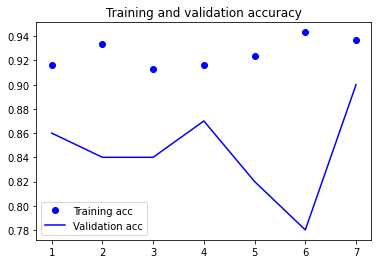

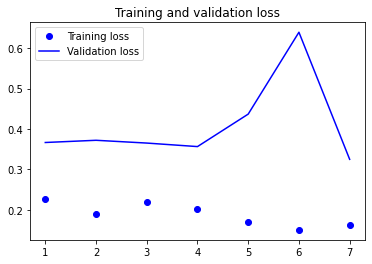

In [29]:
model.save('covid_and_NonCovid_1.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Exercise
We have downlaoded the COVID Image Data for you. Now, please a train and build a classification model to detect COVID vs Non-Covid cases. 